# Prepare Data

**Import**

In [250]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [251]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

warnings.simplefilter(action="ignore", category=FutureWarning)

In [473]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # Drop null column
  df.drop(columns=['Cabin'], inplace=True)

  # drop low-high cardinality features
  df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)

  # Convert `Sex` categorical to binary
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

  return df

df = wrangle('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/dataset/Titanic-Dataset.csv')
print(df.shape)
df.info()

(891, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [252]:
df = pd.read_csv(r'/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/dataset/Titanic-Dataset.csv')

In [253]:
df.shape

(891, 12)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [255]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
df.isnull().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [257]:
# Cabin column contains more than 50% null values. We can drop it
df.drop(columns='Cabin', inplace=True)

In [258]:
# Check low-high cardinality of categorical features
df.select_dtypes("object").nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
dtype: int64

In [259]:
# Name & Ticket has High-Cardinality
df.drop(columns=['Name', 'Ticket'], inplace=True)

In [260]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [262]:
df.select_dtypes("int64").nunique()

PassengerId    891
Survived         2
Pclass           3
SibSp            7
Parch            7
dtype: int64

In [263]:
df.select_dtypes("number").nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

In [264]:
df.drop(columns='PassengerId', inplace=True)

In [265]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [266]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [268]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # Drop null column
  df.drop(columns=['Cabin'], inplace=True)

  # drop low-high cardinality features
  df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)

  return df

In [269]:
df = wrangle('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/dataset/Titanic-Dataset.csv')
print(df.shape)
df.info()

(891, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


**Explore**

In [270]:
corr = df.select_dtypes("number").drop(columns='Survived').corr()
corr

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


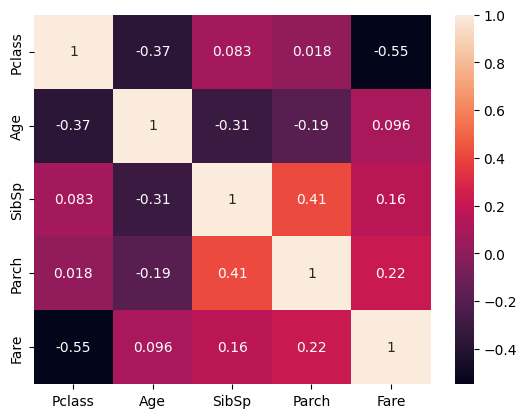

In [271]:
sns.heatmap(corr, annot=True); # no major multicollinearity problem

In [272]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [273]:
features = df.columns[1:]
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [274]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

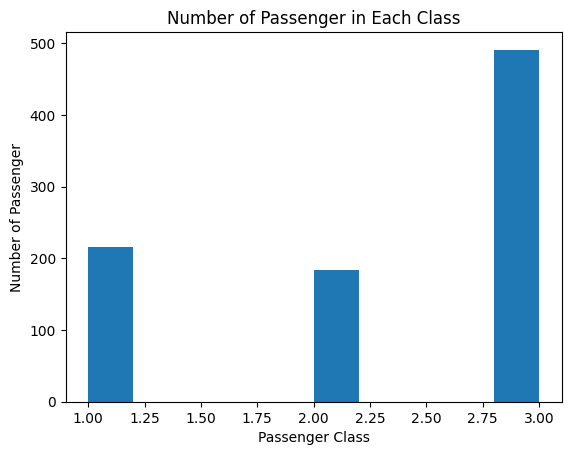

In [299]:
plt.hist(df['Pclass'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passenger')
plt.title('Number of Passenger in Each Class');

In [275]:
total_passenger_class_3 = df['Pclass'].value_counts()[3]
total_passenger_class_3

491

In [276]:
total_passenger_class_2 = df['Pclass'].value_counts()[2]
total_passenger_class_2

184

In [277]:
total_passenger_class_1 = df['Pclass'].value_counts()[1]
total_passenger_class_1

216

In [278]:
total_survived = df[df['Survived'] == 1]
len(total_survived)

342

In [279]:
class_3 = df[df['Pclass'] == 3]
len(class_3)

491

In [280]:
survived_class_3 = df[(df['Survived'] == 1) & (df['Pclass'] == 3)] # survived passenger from class 3
len(survived_class_3)

119

In [281]:
# survival rate of class 3 passenger
survival_rate_class_3 = len(survived_class_3) / total_passenger_class_3
survival_rate_class_3 * 100

24.236252545824847

In [282]:
survived_class_2 = df[(df['Survived'] == 1) & (df['Pclass'] == 2)] # survived passenger from class 2
len(survived_class_2)

87

In [283]:
# survival rate of class 2 passenger
survival_rate_class_2 = len(survived_class_2) / total_passenger_class_2
survival_rate_class_2 * 100

47.28260869565217

In [284]:
survived_class_1 = df[(df['Survived'] == 1) & (df['Pclass'] == 1)] # survived passenger from class 1
len(survived_class_1)

136

In [285]:
# survival rate of class 1 passenger
survival_rate_class_1 = len(survived_class_1) / total_passenger_class_1
survival_rate_class_1 * 100

62.96296296296296

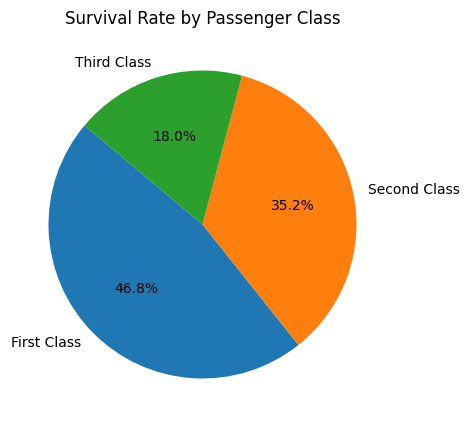

In [286]:
survival_rates = {'First Class': survival_rate_class_1, 'Second Class': survival_rate_class_2, 'Third Class': survival_rate_class_3}

labels = survival_rates.keys()
sizes = survival_rates.values()

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Survival Rate by Passenger Class')
plt.show();


In [287]:
target = 'Survived'

In [288]:
survived = df[df[target] == 1]
not_survived = df[df[target] == 0]

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


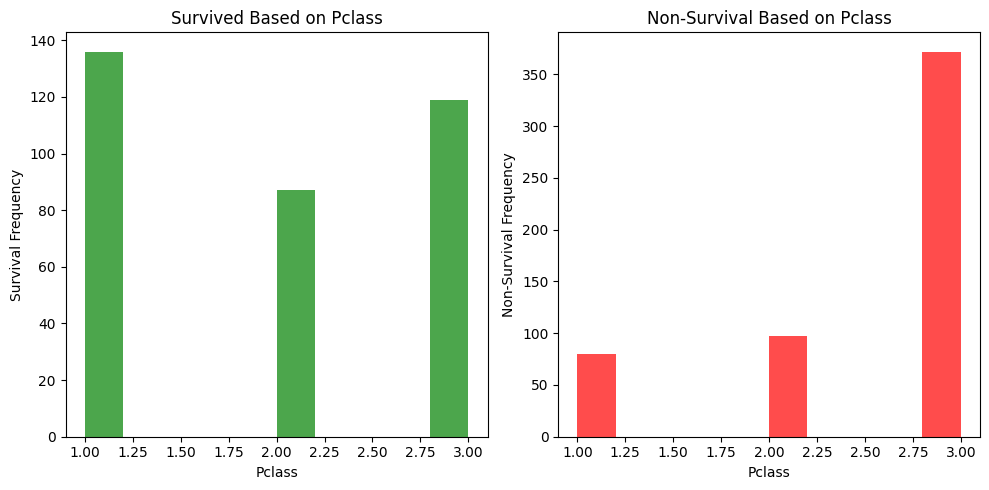

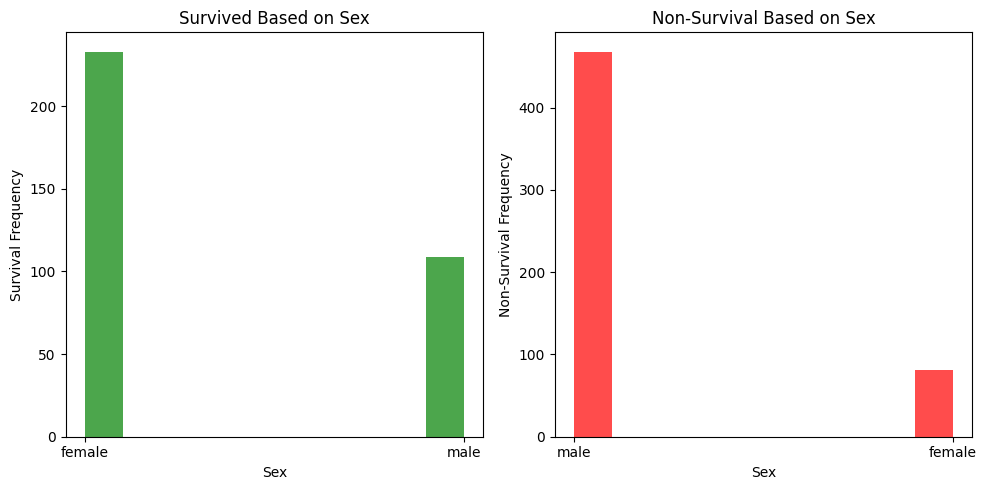

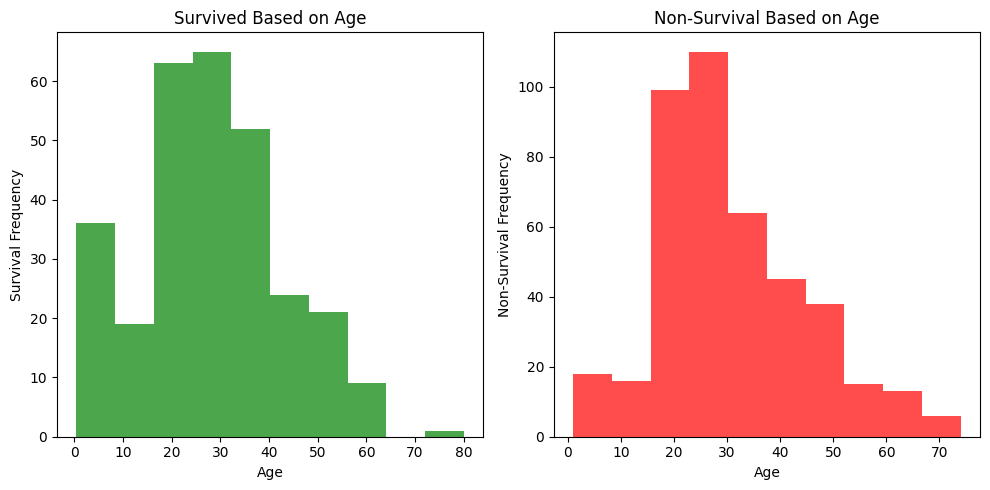

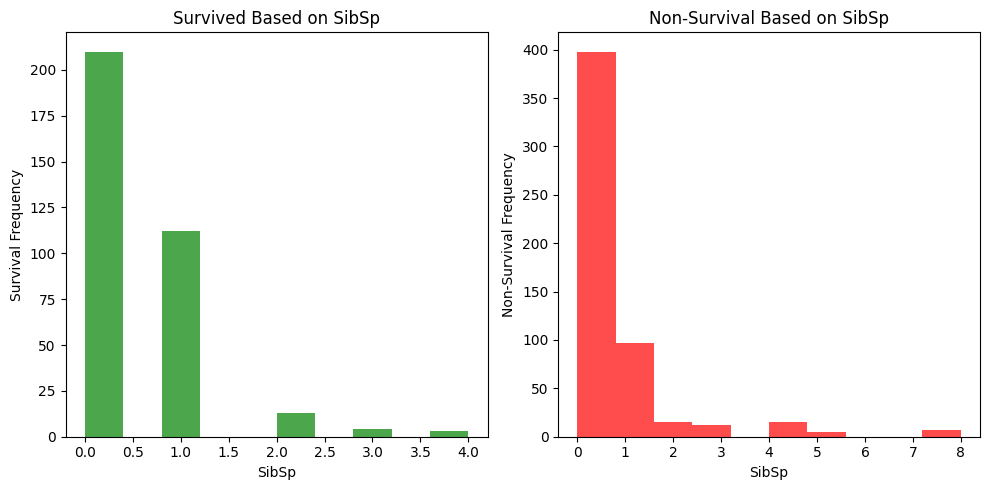

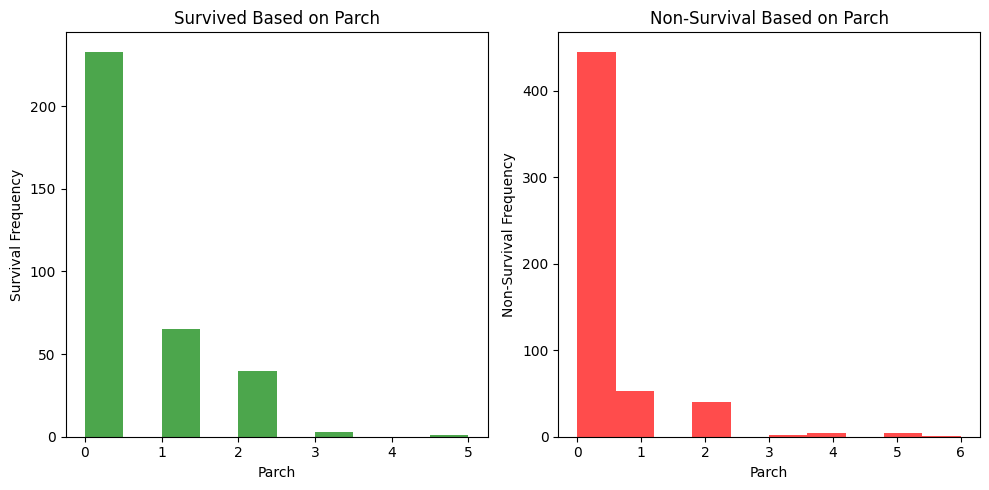

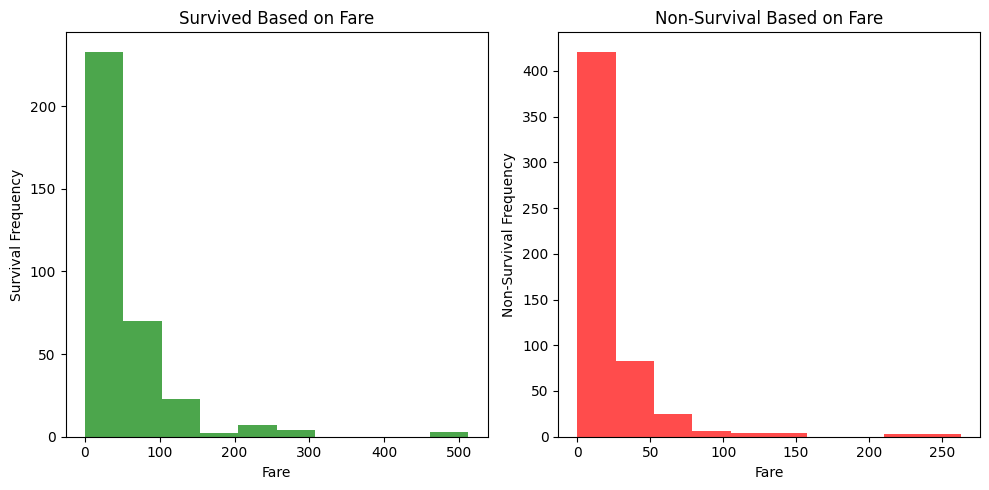

In [290]:
# ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

for feature in features:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(x=survived[feature], color='green', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Survival Frequency')
    plt.title(f'Survived Based on {feature}')

    plt.subplot(1, 2, 2)
    plt.hist(x=not_survived[feature], color='red', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Non-Survival Frequency')
    plt.title(f'Non-Survival Based on {feature}')

    plt.tight_layout()

    plt.show()

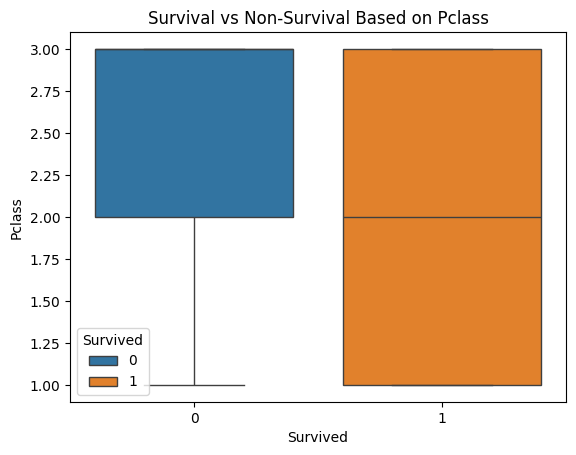

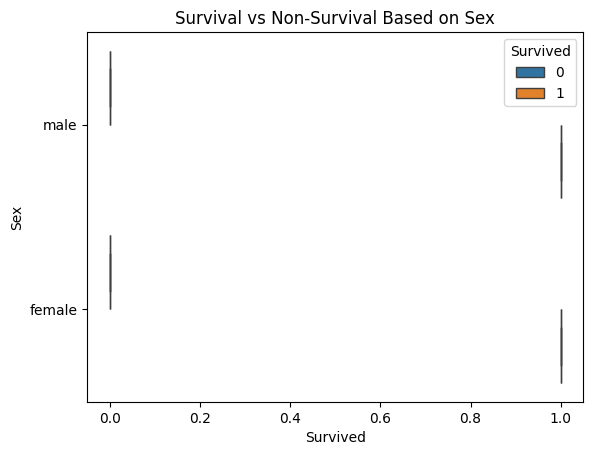

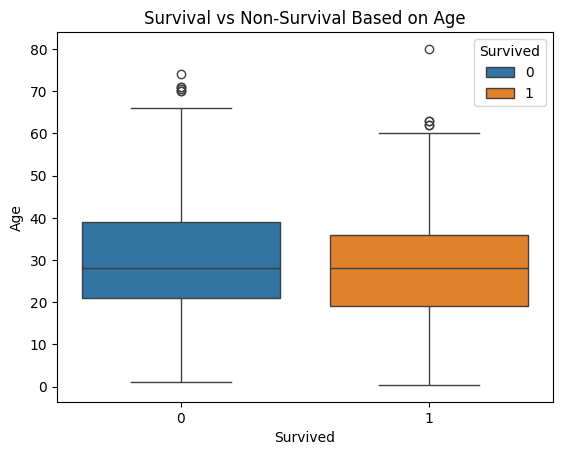

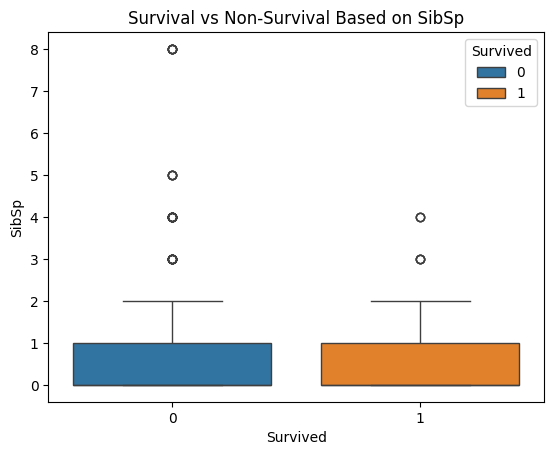

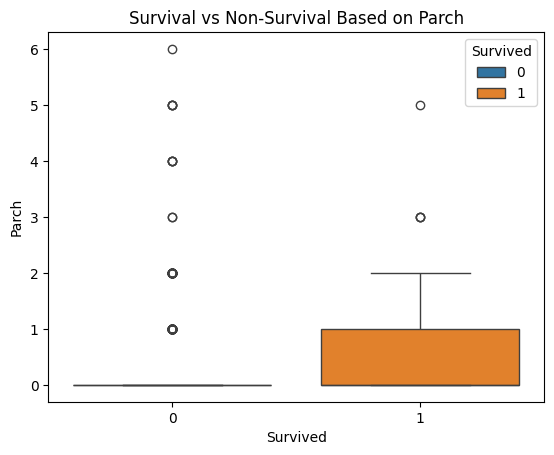

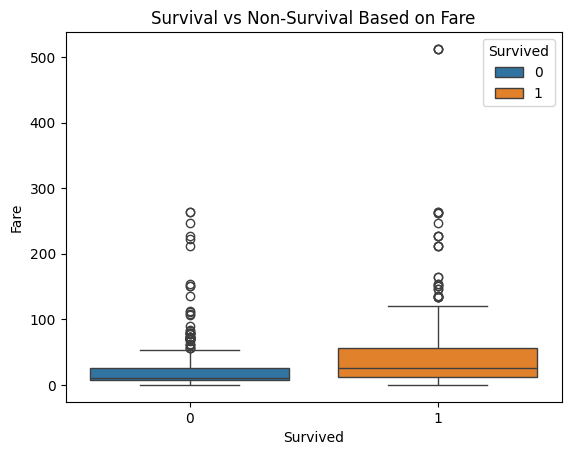

In [295]:
for feature in features:
  sns.boxplot(x=target, y=feature, data=df, hue=target)
  plt.xlabel("Survived")
  plt.ylabel(feature)
  plt.title(f'Survival vs Non-Survival Based on {feature}')
  plt.show();

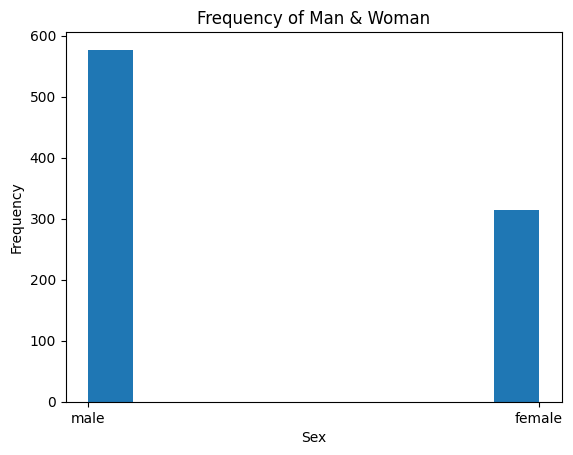

In [296]:
plt.hist(x=df['Sex'])
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Frequency of Man & Woman');

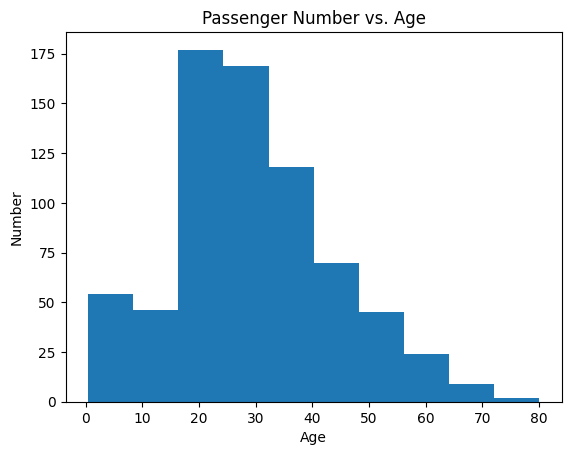

In [298]:
plt.hist(x=df['Age'])
plt.xlabel('Age')
plt.ylabel('Number')
plt.title('Passenger Number vs. Age');

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [301]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # Drop null column
  df.drop(columns=['Cabin'], inplace=True)

  # drop low-high cardinality features
  df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)

  # Convert `Sex` categorical to binary
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

  return df

df = wrangle('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/dataset/Titanic-Dataset.csv')
print(df.shape)
df.info()

(891, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


**Split**

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [304]:
X = df[features]
y = df[target]
X.shape

(891, 6)

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [330]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build Model

**Baseline**

In [306]:
y_train.value_counts()

0    444
1    268
Name: Survived, dtype: int64

In [307]:
y_train.value_counts(normalize=True).max()

0.6235955056179775

In [308]:
acc_baseline = y_train.value_counts(normalize=True).max()
acc_baseline # out model should perform better than this

0.6235955056179775

**Iterate**

In [309]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Logistic Regression

In [310]:
lr = make_pipeline(
    SimpleImputer(),
    LogisticRegression()
)
lr.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [319]:
lr_acc_train = accuracy_score(y_train, lr.predict(X_train))
lr_acc_train

0.800561797752809

In [320]:
lr_acc_test = accuracy_score(y_test, lr.predict(X_test))
lr_acc_test

0.8100558659217877

In [315]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

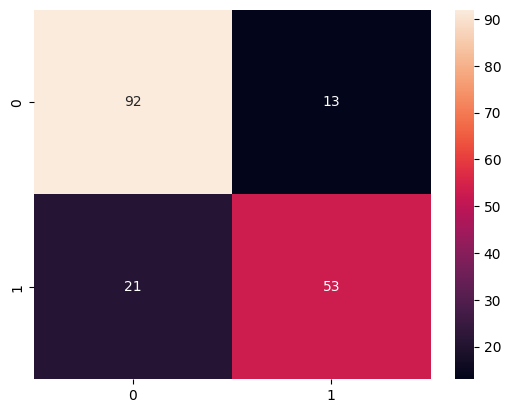

In [321]:
lr_cm = confusion_matrix(y_test, lr.predict(X_test))
sns.heatmap(lr_cm, annot=True);

In [322]:
lr_cr = classification_report(y_test, lr.predict(X_test))
print(lr_cr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Decision Tree

In [323]:
from sklearn.tree import DecisionTreeClassifier

In [324]:
dt = make_pipeline(
    SimpleImputer(),
    DecisionTreeClassifier(random_state=42)
)
dt.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [325]:
dt_acc_train = accuracy_score(y_train, dt.predict(X_train))
dt_acc_train

0.9803370786516854

In [327]:
dt_acc_test = accuracy_score(y_test, dt.predict(X_test))
dt_acc_test # Huge gap between train and test accuracy due to decision tree flexibility. We need to control depth to make less flexible

0.7541899441340782

In [328]:
tree_depth = dt.named_steps["decisiontreeclassifier"].get_depth()
tree_depth

23

In [329]:
depth_hyperparameters = range(1, 50, 2)

In [331]:
training_acc = []
validation_acc = []

for d in depth_hyperparameters:
  dt_test_model = make_pipeline(
      SimpleImputer(),
      DecisionTreeClassifier(max_depth=d, random_state=42)
  )
  dt_test_model.fit(X_train, y_train)

  training_acc.append(dt_test_model.score(X_train, y_train))
  validation_acc.append(dt_test_model.score(X_val, y_val))

print(f"Training Accuracy: {training_acc[:3]}")
print(f"Validation Accuracy: {validation_acc[:3]}")

Training Accuracy: [0.7803163444639719, 0.8330404217926186, 0.8576449912126538]
Validation Accuracy: [0.8181818181818182, 0.8321678321678322, 0.8181818181818182]


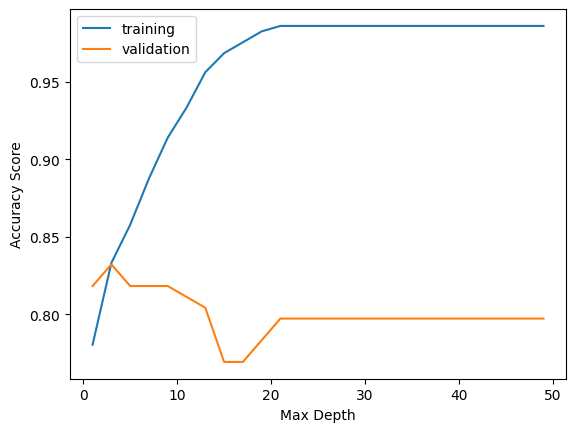

In [332]:
plt.plot(depth_hyperparameters, training_acc, label="training")
plt.plot(depth_hyperparameters, validation_acc, label="validation")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

In [351]:
# From the plot, we can see after depth 3/4, validation accuracy is decreasing
dt = make_pipeline(
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=3, random_state=42)
)
dt.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [352]:
dt_acc_train = accuracy_score(y_train, dt.predict(X_train))
dt_acc_train

0.8330404217926186

In [353]:
dt_acc_test = accuracy_score(y_test, dt.predict(X_test))
dt_acc_test

0.7988826815642458

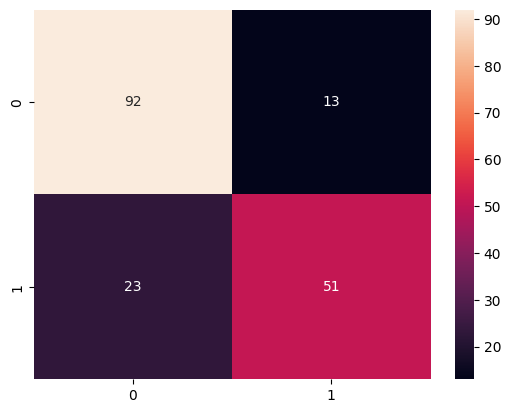

In [355]:
dt_cm = confusion_matrix(y_test, dt.predict(X_test))
sns.heatmap(dt_cm, annot=True);

In [356]:
dt_cr = classification_report(y_test, dt.predict(X_test))
print(dt_cr)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# SVM

In [357]:
from sklearn.svm import SVC

In [358]:
svm = make_pipeline(
    SimpleImputer(),
    SVC()
)
svm.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()), ('svc', SVC())])

In [359]:
svm_acc_train = accuracy_score(y_train, svm.predict(X_train))
svm_acc_train

0.671353251318102

In [360]:
svm_acc_test = accuracy_score(y_test, svm.predict(X_test))
svm_acc_test

0.664804469273743

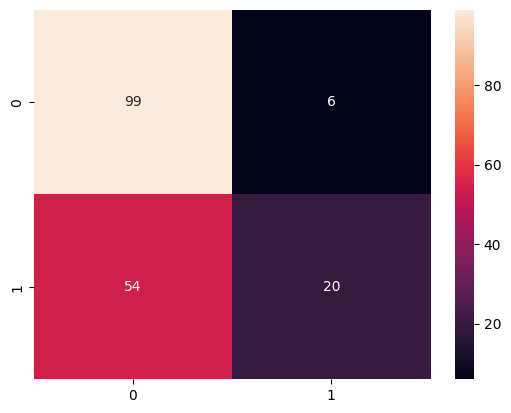

In [361]:
svm_cm = confusion_matrix(y_test, svm.predict(X_test))
sns.heatmap(svm_cm, annot=True);

In [362]:
svm_cr = classification_report(y_test, svm.predict(X_test))
print(svm_cr)

              precision    recall  f1-score   support

           0       0.65      0.94      0.77       105
           1       0.77      0.27      0.40        74

    accuracy                           0.66       179
   macro avg       0.71      0.61      0.58       179
weighted avg       0.70      0.66      0.62       179



# Random Forest

In [363]:
from sklearn.ensemble import RandomForestClassifier

In [367]:
rf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
)
rf.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=3, random_state=42))])

In [368]:
rf_acc_train = accuracy_score(y_train, rf.predict(X_train))
rf_acc_train

0.8523725834797891

In [369]:
rf_acc_test = accuracy_score(y_test, rf.predict(X_test))
rf_acc_test

0.8044692737430168

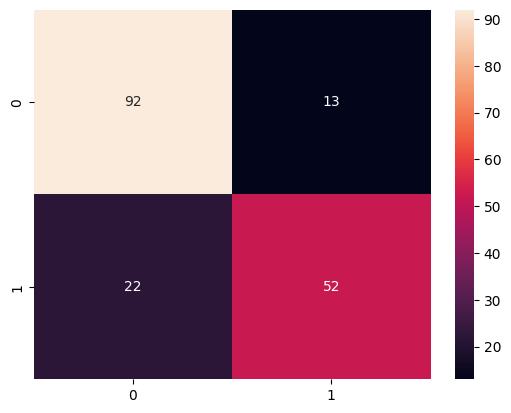

In [370]:
rf_cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(rf_cm, annot=True);

In [371]:
rf_cr = classification_report(y_test, rf.predict(X_test))
print(rf_cr)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# KNN

In [431]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

 Choosing an appropriate value for **n_neighbors** involves a trade-off between **bias and variance** in the model. A **smaller** value tends to *increase the model's complexity and may lead to overfitting*, while a **larger** value can *increase bias but decrease variance*.

In [386]:
n_neighbors = range(1, 100, 2)

In [443]:
param_grid = {'n_neighbors': list(n_neighbors)}

knn = KNeighborsClassifier()

grid_search = make_pipeline(
    SimpleImputer(),
    GridSearchCV(knn, param_grid, cv=5)  # 5-fold cross-validation
)
grid_search.fit(X_train, y_train)

best_params = grid_search.named_steps['gridsearchcv'].best_params_
print(f"Best hyperparameter: {best_params}")

best_model = grid_search.named_steps['gridsearchcv'].best_estimator_
print(best_model)

Best hyperparameter: {'n_neighbors': 5}
KNeighborsClassifier()


In [446]:
n = 5
knn = make_pipeline(
    SimpleImputer(),
    KNeighborsClassifier(n)
)
knn.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [447]:
knn_acc_train = accuracy_score(y_train, knn.predict(X_train))
knn_acc_train

0.804920913884007

In [448]:
knn_acc_test = accuracy_score(y_test, knn.predict(X_test))
knn_acc_test

0.6983240223463687

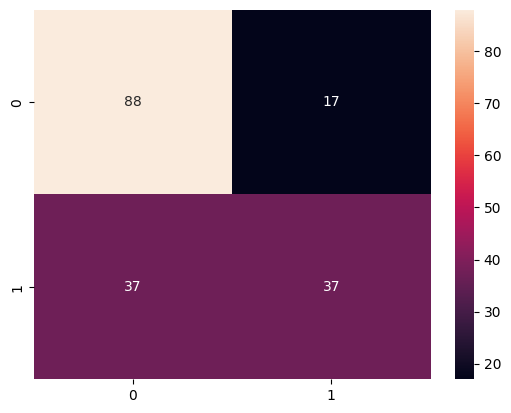

In [449]:
knn_cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(knn_cm, annot=True);

In [450]:
knn_cr = classification_report(y_test, knn.predict(X_test))
print(knn_cr)

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       105
           1       0.69      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.69      0.67      0.67       179
weighted avg       0.70      0.70      0.69       179



From above experiment,
**Best Model:** **Logistic Regression**

# Communicating Results

In [456]:
features

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [459]:
importances = lr.named_steps["logisticregression"].coef_[0]
importances

array([-0.92800441,  2.61128961, -0.03195273, -0.31733786, -0.12885693,
        0.00342339])

In [464]:
feat_imp = pd.Series(np.exp(importances), index=features).sort_values()
feat_imp

Pclass     0.395342
SibSp      0.728085
Parch      0.879100
Age        0.968552
Fare       1.003429
Sex       13.616600
dtype: float64

In [467]:
odds_ratio = feat_imp
odds_ratio

Pclass     0.395342
SibSp      0.728085
Parch      0.879100
Age        0.968552
Fare       1.003429
Sex       13.616600
dtype: float64

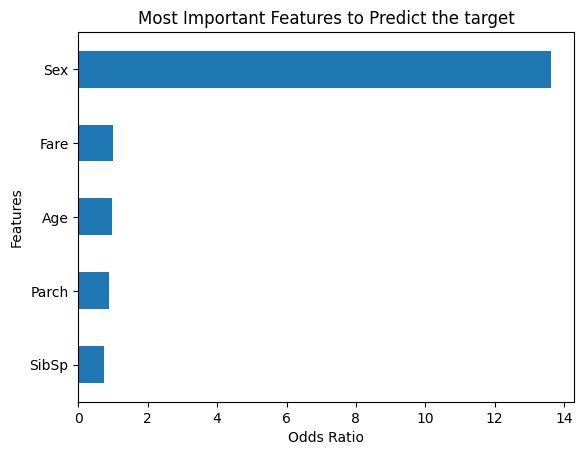

In [470]:
# Show most important features using a horizontal bar plot
odds_ratio.tail().plot(kind='barh')
plt.xlabel('Odds Ratio')
plt.ylabel('Features')
plt.title('Most Important Features to Predict the target');

# Save model

In [471]:
import pickle

In [489]:
# save model (Logistic Regression)
with open('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_lr.pkl', 'wb') as f:
  pickle.dump(lr, f)

# load model
with open('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_lr.pkl', 'rb') as f:
  model_lr = pickle.load(f)

In [490]:
# save model (Decision Tree)
with open('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_dt.pkl', 'wb') as f:
  pickle.dump(dt, f)

# load model
with open('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_dt.pkl', 'rb') as f:
  model_dt = pickle.load(f)

In [491]:
# save model (SVM)
with open('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_svm.pkl', 'wb') as f:
  pickle.dump(svm, f)

# load model
with open('/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_svm.pkl', 'rb') as f:
  model_svm = pickle.load(f)

# Creating .py File

In [492]:
def wrangle(filepath):
  # Read csv file
  df = pd.read_csv(filepath)

  # Drop null column
  df.drop(columns=['Cabin'], inplace=True)

  # drop low-high cardinality features
  df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)

  # Convert `Sex` categorical to binary
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

  return df


def make_prediction(data_filepath, model_filepath):
  X_test = wrangle(data_filepath)

  # load model
  with open(model_filepath, 'rb') as f:
    model = pickle.load(f)

  y_test_pred = model.predict(X_test)
  y_test_pred = pd.Series(y_test_pred)
  return y_test_pred

In [493]:
predict = make_prediction(
    '/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/dataset/test.csv',
    '/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_lr.pkl'
)
print(predict) # index = 1, 5 predicts wrong, others are right

0    1
1    1
2    1
3    0
4    0
5    1
6    0
dtype: int64


In [494]:
predict_dt = make_prediction(
    '/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/dataset/test.csv',
    '/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_dt.pkl'
)
print(predict_dt) # index = 1, 5 predicts wrong, others are right

0    1
1    1
2    1
3    0
4    0
5    1
6    0
dtype: int64


In [495]:
predict_svm = make_prediction(
    '/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/dataset/test.csv',
    '/content/drive/MyDrive/CODSOFT/Titanic Survival Prediction/model/titatic_survival_svm.pkl'
)
print(predict_svm) # index = 0, 1, 3 predicts wrong, others are right

0    0
1    0
2    1
3    1
4    0
5    0
6    0
dtype: int64
